## Observations and Insights

1. There is a high correlation (r-value of .84) between mice who were treated with Capomulin's weight and their average tumor volume (mm3). This could mean that for the Capomulin regime, a mouse's weight could have an effect on its tumor size over time, with the data indicating that the larger its weight, the bigger its tumor will be.

2. The drug regimes Ramicane, Capomulin, Propriva, and Ceftamin seem to be the four most promising treatments, as the those drugs saw the saw the smallest average tumor size at the end of their treatments (i.e. the last timepoint for each mouse).   

3. Although the top four drug regimes were Ramicane, Capomulin, Propriva, and Ceftamin, Ramicane and Capomulin seem to be the two best possible treatments. Since the starting tumor volume (timepoint = 0) for each mouse under each treatment was 45.00mm3, and the average final tumor volume (max timepoint for each mouse) for Ramicane, Capomulin, Propriva, and Ceftamin were 36.19, 36.67, 56.74, and 57.75 respectively, then the only two treatments that actually reduced the average tumor size were Ramicane and Capomulin.


## Dependencies and starter code

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [79]:
# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combined.head(40)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_reg = combined.groupby(["Drug Regimen"])
reg_mean = round(grouped_reg["Tumor Volume (mm3)"].mean(),2)
reg_median = round(grouped_reg["Tumor Volume (mm3)"].median(),2)
reg_var = round(grouped_reg["Tumor Volume (mm3)"].var(),2)
reg_sd = round(grouped_reg["Tumor Volume (mm3)"].std(),2)
reg_sem = round(grouped_reg["Tumor Volume (mm3)"].sem(),2)
regimen_data = pd.DataFrame({"Tumor Volume Mean": reg_mean,
                            "Tumor Volume Median": reg_median,
                            "Tumor Volume Variance": reg_var,
                            "Tumor Volume SD": reg_sd,
                            "Tumor Volume SEM": reg_sem})
regimen_data

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume SD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0, 0.5, 'Number of Data Points')

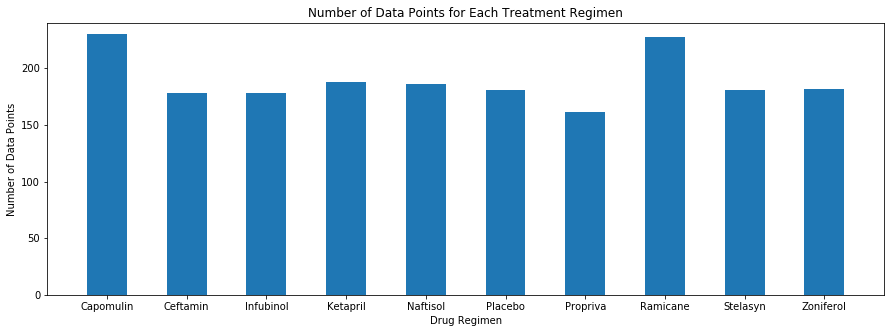

In [81]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Make a dataframe grouped by drug regime, and find out how many data points exist in each
treatment_points = combined.groupby(["Drug Regimen"])
point_count = treatment_points["Mouse ID"].count()

# Make da graph
point_count.plot(kind="bar", figsize=(15,5), align="center")
plt.xticks(rotation="horizontal")
plt.xlim(-.75, len(treatment_points) - .25)
plt.ylim(0, max(point_count) + 10)
plt.title("Number of Data Points for Each Treatment Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

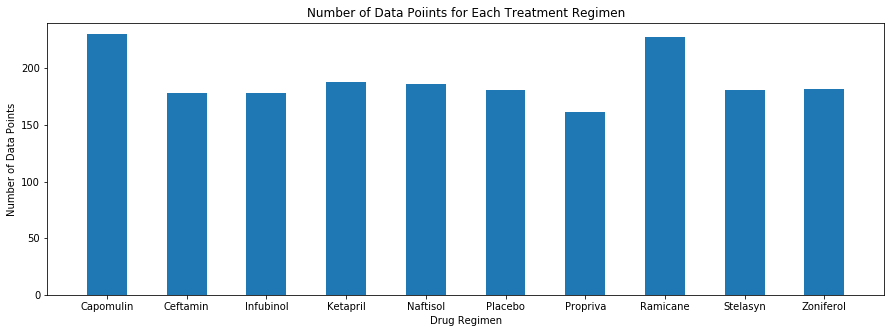

In [82]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Create a list for x-values
x_axis = point_count.keys()

# GraAaAaAAph dat
plt.figure(figsize=(15,5))
plt.bar(x_axis, point_count, width=.5, align="center")
plt.xlim(-.75, len(x_axis) - .25)
plt.ylim(0, max(point_count) + 10)
plt.title("Number of Data Poiints for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

Text(0.5, 1.0, 'Distribution of Male vs. Female Mice')

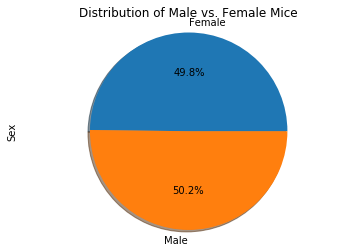

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined.groupby(["Sex"])
gender_count = gender["Mouse ID"].nunique()
gender_count.plot(kind="pie", autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Distribution of Male vs. Female Mice")

Text(0.5, 1.0, 'Distribution of Male vs. Female Mice')

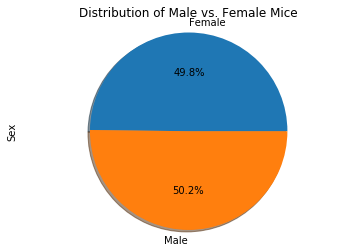

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
g_x_axis = gender_count.keys()
plt.pie(gender_count, labels=g_x_axis, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Distribution of Male vs. Female Mice")

## Quartiles, outliers and boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create a new grouped data frame that uses the max timepoint for each mouse
volume = combined.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()

# Merge the new data frame with the original to only get the tumor volume at max timepoint
volume_merge = pd.merge(volume, combined, on=("Mouse ID","Timepoint"), how="left")
volume_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
244,q633,45,Zoniferol,Male,12,25,70.827796,2
245,s337,45,Zoniferol,Male,14,27,62.109651,4
246,w140,5,Zoniferol,Female,19,30,47.717952,0
247,w575,45,Zoniferol,Female,16,28,68.401286,3


In [86]:
# Figure out top 4 treatments by getting the mean tumor size of last timepoint of each mouse, per treatment
top_four = volume_merge.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
top_four_ = top_four.sort_values(ascending=True)
top_four_.head(4)

Drug Regimen
Ramicane     36.191390
Capomulin    36.667568
Propriva     56.736964
Ceftamin     57.753977
Name: Tumor Volume (mm3), dtype: float64

In [87]:
# Clean data to only be four treatments
actual_top = volume_merge.loc[(volume_merge["Drug Regimen"]=="Capomulin")|(volume_merge["Drug Regimen"]=="Ramicane")|(volume_merge["Drug Regimen"]=="Propriva")|(volume_merge["Drug Regimen"]=="Ceftamin")]
actual_top = actual_top.reset_index(drop=True)
actual_top = actual_top[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
actual_top

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,b128,Capomulin,38.982878
1,b742,Capomulin,38.939633
2,f966,Capomulin,30.485985
3,g288,Capomulin,37.074024
4,g316,Capomulin,40.159220
...,...,...,...
95,s508,Ramicane,30.276232
96,u196,Ramicane,40.667713
97,w678,Ramicane,43.166373
98,y449,Ramicane,44.183451


In [88]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin outliers
capomulin = actual_top.loc[actual_top["Drug Regimen"]=="Capomulin"]
cap_vol = capomulin["Tumor Volume (mm3)"]
quartiles = cap_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
cap_outliers = capomulin.loc[(capomulin["Tumor Volume (mm3)"] < lower_bound) | (capomulin["Tumor Volume (mm3)"] > upper_bound)]
print(f"Capomulin tumor volume values below {round(lower_bound,2)} could be outliers.")
print(f"Capomulin tumor volume values above {round(upper_bound,2)} could be outliers.")

# Ramicane outliers
ramicane = actual_top.loc[actual_top["Drug Regimen"]=="Ramicane"]
ram_vol = ramicane["Tumor Volume (mm3)"]
r_quartiles = ram_vol.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
ram_outliers = ramicane.loc[(ramicane["Tumor Volume (mm3)"] < r_lower_bound) | (ramicane["Tumor Volume (mm3)"] > r_upper_bound)]
print(f"Ramicane tumor volume values below {round(r_lower_bound,2)} could be outliers.")
print(f"Ramicane tumor volume values above {round(r_upper_bound,2)} could be outliers.")

# Propriva outliers
propriva = actual_top.loc[actual_top["Drug Regimen"]=="Propriva"]
prop_vol = propriva["Tumor Volume (mm3)"]
p_quartiles = prop_vol.quantile([.25,.5,.75])
p_lowerq = p_quartiles[0.25]
p_upperq = p_quartiles[0.75]
p_iqr = p_upperq-p_lowerq

p_lower_bound = p_lowerq - (1.5*p_iqr)
p_upper_bound = p_upperq + (1.5*p_iqr)
prop_outliers = propriva.loc[(propriva["Tumor Volume (mm3)"] < p_lower_bound) | (propriva["Tumor Volume (mm3)"] > p_upper_bound)]
print(f"Propriva tumor volume values below {round(p_lower_bound,2)} could be outliers.")
print(f"Propriva tumor volume values above {round(p_upper_bound,2)} could be outliers.")

# Ceftamin outliers
ceftamin = actual_top.loc[actual_top["Drug Regimen"]=="Ceftamin"]
ceft_vol = ceftamin["Tumor Volume (mm3)"]
c_quartiles = ceft_vol.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
ceft_outliers = ceftamin.loc[(ceftamin["Tumor Volume (mm3)"] < c_lower_bound) | (ceftamin["Tumor Volume (mm3)"] > c_upper_bound)]
print(f"Ceftamin tumor volume values below {round(c_lower_bound,2)} could be outliers.")
print(f"Ceftamin tumor volume values above {round(c_upper_bound,2)} could be outliers.")

Capomulin tumor volume values below 20.7 could be outliers.
Capomulin tumor volume values above 51.83 could be outliers.
Ramicane tumor volume values below 17.91 could be outliers.
Ramicane tumor volume values above 54.31 could be outliers.
Propriva tumor volume values below 28.95 could be outliers.
Propriva tumor volume values above 82.74 could be outliers.
Ceftamin tumor volume values below 25.36 could be outliers.
Ceftamin tumor volume values above 87.67 could be outliers.


In [89]:
# Determine if there are any outliers
combined_outliers = pd.merge(cap_outliers, ram_outliers, how="outer")
combined_outliers_2 = pd.merge(combined_outliers, prop_outliers, how="outer")
combined_outliers_3 = pd.merge(combined_outliers_2, ceft_outliers, how="outer")
combined_outliers_3
print("There are no outliers in the dataset.")

There are no outliers in the dataset.


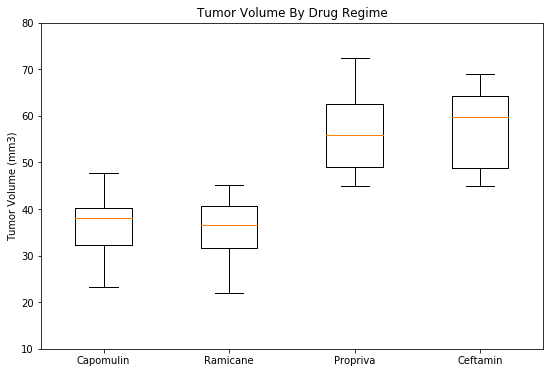

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [cap_vol, ram_vol, prop_vol, ceft_vol]
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data)
ax.set_xticklabels(["Capomulin", "Ramicane", "Propriva", "Ceftamin"])
plt.xlim(.5, len(data) + .5)
plt.ylim(10, 80)
plt.title('Tumor Volume By Drug Regime') 
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

<function matplotlib.pyplot.show(*args, **kw)>

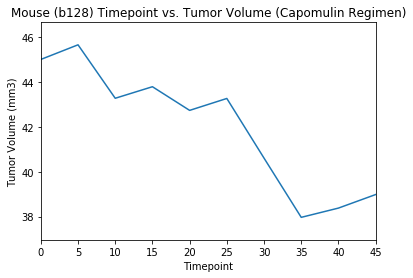

In [91]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = combined.loc[combined["Mouse ID"]=="b128"]
x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Mouse (b128) Timepoint vs. Tumor Volume (Capomulin Regimen)")
plt.xlabel("Timepoint")
plt.xlim(0, max(x_axis))
plt.ylim(min(y_axis) - 1, max(y_axis) + 1)
plt.ylabel("Tumor Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

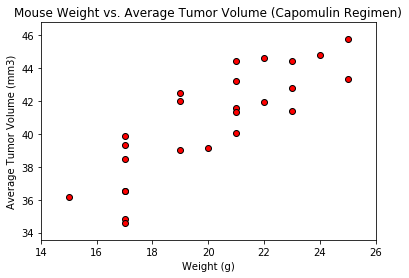

In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = combined.loc[combined["Drug Regimen"]=="Capomulin"]
grouped_cap = capomulin_regimen.groupby(["Mouse ID", "Weight (g)"])
grouped_avg = pd.DataFrame(grouped_cap["Tumor Volume (mm3)"].mean())
grouped_avg = grouped_avg.reset_index()
weight = grouped_avg["Weight (g)"]
volume = grouped_avg["Tumor Volume (mm3)"]

plt.scatter(weight, volume, marker="o", facecolors="red", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlim(min(weight) - 1, max(weight) + 1)
plt.ylim(min(volume) - 1, max(volume) + 1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

The correlation coefficient is: 0.84
The line equation is: y = 0.95x + 21.55


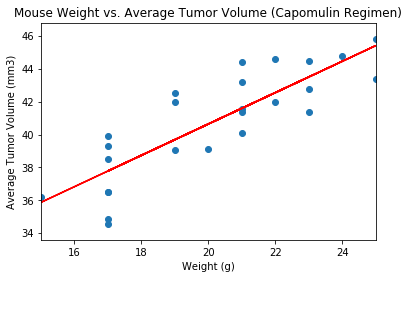

In [93]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,volume)
print(f"The correlation coefficient is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlim(min(weight), max(weight))
plt.ylim(min(volume) - 1, max(volume) + 1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The line equation is: {line_eq}")